# Problem Set 2

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials. 

In [86]:
# use this cell to import the modules you will be using
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

### Python Basics

#### (1)
Based on excercise 12 chapter 4 in ISLR.  
$(a)$ write a function called `power` that raises the input to 3rd power. Use the function to calculate $10^3$ 

In [87]:
def power(n):
    n = n**3
    return n
power(10)

1000

$(b)$ write a function called `power2` that takes two inputs and raises the first number to the power of the second number. Use this function to calculate $10^3$, $8^{17}$ and $131^3$

In [88]:
def power2(a,b):
    c = a**b
    return c

print(power2(10,3))
print(power2(8,17))
print(power2(131,3))




1000
2251799813685248
2248091


$(c)$ Create lists of values of squared and cubed vlaues of 1 through 5 using you functions. You can use loops or list comprehensions to do this. Display the curves of the first, second and third powers of the inputs

In [89]:
f = []
s = []
th = []

for i in range(5):
    f.append(i**1)
    s.append(i**2)
    th.append(i**3)
    
df = pd.DataFrame({
    "first": f,
    'square': s,
    "cube": th
})
df.head()

,first,square,cube
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


$(d)$ Add a legend to the plot that shows which color corresponds to the power

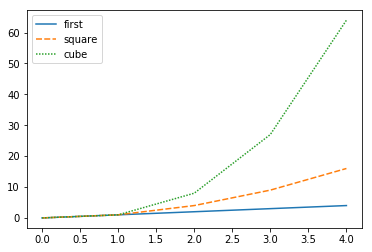

In [90]:
sns.lineplot(data=df)

$(e)$ create a function called `plot_power` that creates a plot for a range of values that are given as an argument raised to the integer power given. A function call should look something like this `plot_power(low,high,power)` feel free to use different variable names for inputs.

getting here
getting here
getting here


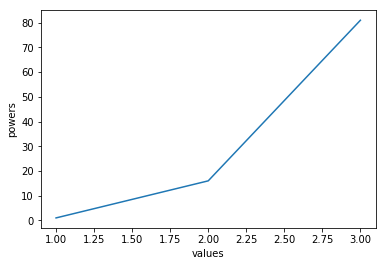

In [91]:
def plot_power(low, high, exp):
    pv = []
    i = low
    while i <= high:
        pv.append([i, power2(i, exp)])
        i += 1
        print("getting here")
        #print(pv)       
    pv = pd.DataFrame(pv, columns = ["values", "powers"])
    return sns.lineplot(x = "values", y = "powers", data=pv)


plot_power(1, 3, 4)   

$(f)$ Define a function called `display_power_plots` that plots multiple powers based on a list of them passed as an argument over a range passed in similarly to the one above. Add a legend that shows which curve corresponds to which power. A function call should something look like this `display_power_plots(low,high,[p1,p2,p3])`

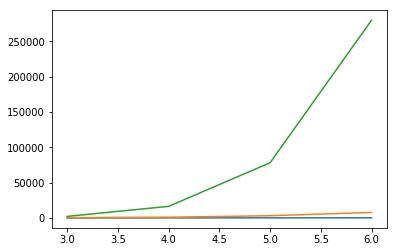

In [92]:
# def display_power_plots(low,high,list(p1,p2,p3):
#     first = []
#     second = []
#     third = []
#     while i <= high:
#         first.append([i, i**p1])
#         second.append([i, i**p2])
#         third.append([i, i**p3])
#         #pv.append([i, power2(i, exp)])
#         i += 1
#         #print("getting here")
#         #print(pv)       
#     first = pd.DataFrame(first, columns = ["values", "powers"])
#     second = pd.DataFrame(second, columns = ["values", "powers"])
#     third = pd.DataFrame(third, columns = ["values", "powers"])
    
#     plt.plot(first, label = "first power")
#     plt.plot(second, label = "second power")
#     plt.plot(third, label = "third")
    
    
#     return plt.show() #sns.lineplot(x = "values", y = "powers", data=pv)


def display_power_plots(low, high, list_of_powers):
    for i in list_of_powers:
        sns.lineplot(range(low, high+1), [power2(x, i) for x in range(low, high+1)])
        
list_of_powers = [3,5,7]
display_power_plots(3,6, list_of_powers)

#### 2
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.  
Look at the dtypes of the variables and correct the problematic values to be the mean of the values that are present. Update the column so python knows to treat the column as a numeric variable and not strings.

In [93]:
#read in data 
auto = pd.read_csv("Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


$(a)$ Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the median() method on the mpg column of the dataframe that you are suing to store the auto data. 

In [94]:
#defining a function for my mpg indicator if it above or below average 
x = np.median(auto.mpg)
mpg_indicator = []

for i in range(len(auto.mpg)):
    if auto.mpg[i] <x:
        mpg_indicator.append(0)
    else:
        mpg_indicator.append(1)
auto["mpg_indicator"] = mpg_indicator
auto.head()
        
        

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_indicator
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all.

$(b)$ Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

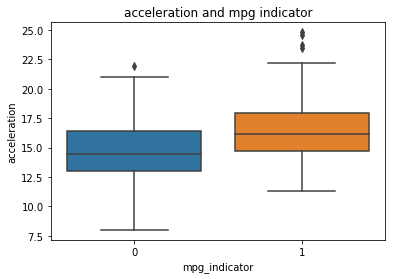

In [95]:
plot = sns.boxplot(x = auto.mpg_indicator, y =auto.acceleration )
plt.title("acceleration and mpg indicator")
plt.show()

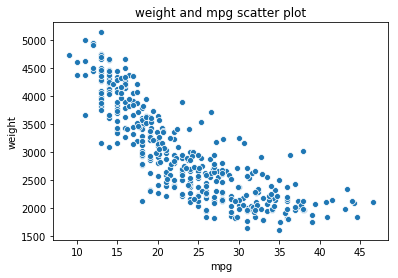

In [96]:
scatter = sns.scatterplot(x = auto.mpg, y = auto.weight)
plt.title("weight and mpg scatter plot")
plt.show()

$(c)$ Split the data into a training set and test set. The variable you created called `mpg01` will be the y variable.

In [97]:
from sklearn.model_selection import train_test_split

#selecting all of the data except the last column
data = auto.iloc[:, :-1]
data.head() #want to get rid of the name column so 
data = data.select_dtypes(include = [np.number])
data.head()#ok only numerics

#selecting our y variable
y = auto.mpg_indicator

#train test split 
X_train, X_test, y_train, y_test = train_test_split(data, y,
                                                   test_size = 0.33,
                                                   random_state = 42)
print(X_train.shape)
print(X_test.shape)


(265, 7)
(132, 7)


$(d)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?

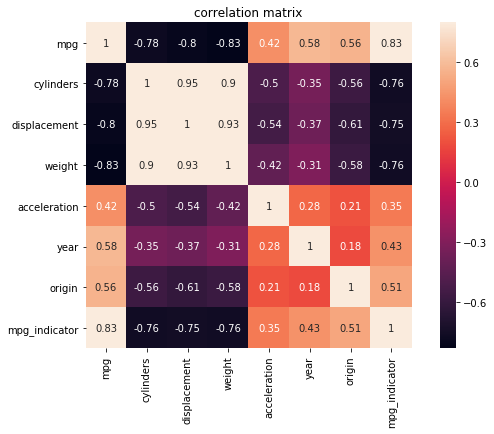

In [98]:
''' so the linear discriminant analysis is similar
to PCA, it is a way for us to reduce our dimentions '''
#importing the library 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#creating an object from that class 
lda = LinearDiscriminantAnalysis(n_components = 3)

#ok finding the variables that seam to be the most correlated 
#creating a correlation heat map
#corr = X_train.corr()
corr_mat = auto.corr()
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr_mat,vmax=.8,square=True, annot = True)
plt.title("correlation matrix")
plt.show()

###### so looking at the row at the bottom we can see that the highest correlated variables are mpg,(naturally), acceleration, year, and orgin, so we will subset the data of X_train and X_test, so that it only contains the highest correlated variables 

In [99]:
#subsetted my data to only select data that is highly correlated 
X_train = X_train[["origin", 'year', 'mpg', 'acceleration']]

X_test = X_test[["origin", 'year', 'mpg', 'acceleration']]

'''ok now we have the selected columns that we want
to do LDA on the high correlated variables'''
print(X_train.shape)
print(X_test.shape)

#fitting and transforming the data according to the class object
X_lda = lda.fit(X_train, y_train)
#X_test = lda.transform(X_test)

(265, 4)
(132, 4)


In [100]:
#now predicting the outcome 
y_pred = X_lda.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(y_test.shape)

[[59  0]
 [ 7 66]]
(132,)


###### so this confusion matrix is telling us that of the 132 samples in our testing data set, we correctly predicted 55 to be 0 when they were 0, incoreectly predicted 4 to be a 1 when it should have been a 0.  Predicted a 0 on two that should have been a one and accuratly predicted 71 ones that were correct, so our LDA is doing pretty well, 

In [101]:
'''to see exactly how accurate we are we will use 
recall, f1 and precision from the classification_report'''
from sklearn.metrics import f1_score, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.90      0.95        73

   micro avg       0.95      0.95      0.95       132
   macro avg       0.95      0.95      0.95       132
weighted avg       0.95      0.95      0.95       132



###### the grader will recall that precision is the number of true positives/ true positives+false positives, and recall is equal to the number of true positives/truepositives +false negatives.  and f1 is the weighted average of the two.  We can see that our recall is slightly higher when looking at 1's vs zeros, but other than that the model appears to be classifying the data very accurately 

$(e)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?

In [102]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#because I re-defined the X_train, X_test, stuff above
#I will re split and only select the same variabes from above
#for comparisons sake 
X_train, X_test, y_train, y_test = train_test_split(data, y,
                                                   test_size = 0.33,
                                                   random_state = 42)
X_train = X_train[["origin", 'year', 'mpg', 'acceleration']]
X_test = X_test[["origin", 'year', 'mpg', 'acceleration']]

#creating an object from the class,
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)
print("this countains the group means, but not the coefficients because it is by definitiona quadratic model and not a linear function.")

[0.52075472 0.47924528]
[[ 1.15942029 74.62318841 16.80652174 14.49855072]
 [ 1.92913386 77.59055118 30.00866142 16.18267717]]
this countains the group means, but not the coefficients because it is by definitiona quadratic model and not a linear function.


$(f)$ Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?

In [103]:
#predicting
pred2 = model2.predict(X_test)
cm2 = confusion_matrix(pred2, y_test)
print(cm2)

#same explination as above just different numbers

#printing classification report 
report2 = classification_report(y_test, pred2)
print(report2)

[[51  1]
 [ 8 72]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        59
           1       0.90      0.99      0.94        73

   micro avg       0.93      0.93      0.93       132
   macro avg       0.94      0.93      0.93       132
weighted avg       0.94      0.93      0.93       132



###### so we can see that the above sample is more accurate out os sample.  the difference of our precision and recall is greater with a QDA model, and the f1 averages are lower. we can also see that we are misclassiftying more false negatives, 8 in this case.  So for this data set the LDA is more accurate than the QDA

$(g)$ Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). How accurate is the model?  
Which value of K seems to perform the best on this data set?

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, y,
                                                   test_size = 0.33,
                                                   random_state = 42)
X_train = X_train[["origin", 'year', 'mpg', 'acceleration']]
X_test = X_test[["origin", 'year', 'mpg', 'acceleration']]


from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

#fit the model 
log_reg.fit(X_train, y_train)

#predict 
log_pred = log_reg.predict(X_test)
score = log_reg.score(X_test, y_test)
print(score)
print("the score is the f1 score")

cm3 = confusion_matrix(log_pred, y_test)
print(cm3) 
print("see explinations from above on interpretations for the table")

#same explination as above just different numbers

#printing classification report 
report3 = classification_report(y_test, log_pred)
print(report3)

#print("see explinations from above on interpretations for the table")

0.9545454545454546
the score is the f1 score
[[53  0]
 [ 6 73]]
see explinations from above on interpretations for the table
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        59
           1       0.92      1.00      0.96        73

   micro avg       0.95      0.95      0.95       132
   macro avg       0.96      0.95      0.95       132
weighted avg       0.96      0.95      0.95       132



C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now run a random forest classifier on the data. Use cross validation to find optimal parameters.

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter


#first we resplit the data again 
X_train, X_test, y_train, y_test = train_test_split(data, y,
                                                   test_size = 0.33,
                                                   random_state = 42)

X_train = X_train[["origin", 'year', 'mpg', 'acceleration']]
X_test = X_test[["origin", 'year', 'mpg', 'acceleration']]
#y_train = pd.DataFrame(y_train)
print(X_train.shape)
print(y_train.shape)
''' to build a good random forest, you need a good max depth
and a good number of trees, and you should also test if your 
classes are balanced or not, so we will see what are the best 
parameters for the random forest we will build'''

#creating a dictionary with multiple options for the parameters, 
param_dict = {"n_estimators":[100,500,1000,2500,5000],
              "max_depth":[1,3,5,10]}

#creating the random forest classifier 
rf = RandomForestClassifier()
#creating the grid search to search over my parameters and find the best ones 
gs = GridSearchCV(rf, param_dict, scoring = "f1_macro", n_jobs = -1, verbose = 2)


(265, 4)
(265,)


In [106]:
#rf.fit(X_train, y_train)
#fitting the model 
gs.fit(X_train, y_train)

#looking at results 
gs.cv_results_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   45.2s finished
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by de

{'mean_fit_time': array([ 0.20490154,  0.96955252,  2.03047212,  5.22089775, 10.33119003,
         0.24506036,  1.0758996 ,  2.25431792,  5.80430341, 11.09692502,
         0.21942886,  1.15206782,  2.38327344,  6.16713405, 10.46508781,
         0.28363387,  1.29783972,  2.41084933,  5.78456442,  9.22491407]),
 'std_fit_time': array([0.01244783, 0.12635785, 0.24691321, 0.16296991, 0.12132461,
        0.01632581, 0.08106435, 0.05582458, 0.66133687, 0.18404866,
        0.00645526, 0.0428073 , 0.27915409, 0.46132549, 0.75689064,
        0.00687548, 0.05833251, 0.27405752, 0.18667652, 0.53163438]),
 'mean_score_time': array([0.01897868, 0.08739837, 0.19992065, 0.48725851, 0.88471047,
        0.02513258, 0.11786397, 0.1917789 , 0.48339415, 0.88287687,
        0.02834098, 0.10549625, 0.19666354, 0.44374084, 1.02142429,
        0.02599184, 0.13175821, 0.19716684, 0.48140073, 0.68105483]),
 'std_score_time': array([0.00161546, 0.00190101, 0.00885098, 0.03622767, 0.02897231,
        0.00366778, 

In [107]:
#ok so now printing the report for accuracy

#but interesting to see the best parameters 
print("Best Params: {}".format(gs.best_params_))


rf.fit(X_train, y_train)
forest_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, forest_pred))


C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Params: {'max_depth': 1, 'n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        73

   micro avg       1.00      1.00      1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###### well that is doing 100% correct in training and testing, so thats pretty good 

#### 3 
The next problem deals with regularized regression and cross validation. The boston dataset is described right after it is loaded in.  
$(a)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. Use the default for the penalty coefficient. Display the coefficients and test error for each.

In [108]:
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston['DESCR'])
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

###### starting with ols cuz like what else is there lol 

In [109]:
#first doing a little data exploration
x.head()
x.isnull().sum()
type(y[0])

#ok so it looks like we are dealing with purely numeric
# data and that there are no missing values, so we 
# are free to proceed with OLS 
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

#first we add a constant 
X_train = sm.add_constant(x)
X_test = sm.add_constant(x)

#creating a model and fitting it to ols 
model = sm.OLS(y, X_train).fit()
#getting predictions
predictions = model.predict(X_test)
#printing tabel 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        13:38:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### but we need to do cross validation, and for some reason, I'm having a hard time doing it with the sm.ols module, so will create a linear regression class and to it that way 

question asks to display the coefficients, those can be found in the COEF column in the above tabe

In [110]:
#creating object from to class object 
lr = SGDRegressor()
'''we will use the SGD resgressor because of the stocastic
gradient descent that it can do when cross validating, perhaps will 
give us a little bit better score than a simple linear regression model

first we will scale the data, make it so all of our observations 
are between -1, 1, this will help our estimator when dealing with 
outliers, because linear regressions are very sensitive to outliers
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
#splitting
X_train, X_test, y_train, y_test = train_test_split(scaled_x, 
                                                    y, 
                                                    random_state=42)
#fitting
scaler.fit(X_train, y_train)
ols = SGDRegressor(tol = .0001, eta0 = .01)
ols.fit(X_train, y_train)
pred_ols = ols.predict(X_train)
''' to see how well our model is doing and to get back to the 
original data points, we can use the MSE, that will get us back to 
the original scale of our data, which makes it easier to understadn'''
mse = mean_squared_error(y_train, pred_ols)
print(mse)
print("ok so not good, but not terrible, kind of meh")

#ok now cross validating 
ols = SGDRegressor(alpha=0.01, max_iter=100000).fit(X_train, y_train)
scores = cross_val_score(ols,X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

22.501680835472385
ok so not good, but not terrible, kind of meh


C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added 

Cross-validation scores: [0.73552731 0.64342997 0.76107483 0.77733555 0.66281386]
Average cross-validation score: 0.72


In [111]:
#storing the coefficients in a list for feuture graphing 
ols_coef = list(ols.coef_)

###### next we move onto the lasso 

In [112]:
from sklearn.linear_model import Lasso
#same as always create an object from the data, fit 
#because I scaled the data above, I will have to re split 
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=42)

lasso = Lasso().fit(X_train, y_train)
#following the example in class, this will print our training score 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
#and this will give us our test score, to see if we are over fitting 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
#number of features used 
print("Number of features used:", np.sum(lasso.coef_ != 0))

#ok now cross validating 
lasso_cv = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
scores = cross_val_score(lasso_cv,X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Training set score: 0.69
Test set score: 0.65
Number of features used: 10
Cross-validation scores: [0.73204471 0.64560795 0.76154321 0.77423984 0.65926209]
Average cross-validation score: 0.71


###### so the cross validation mean is slightly higher, and our training is slightly better than our test, so in training we might be slightly over fitting, but when we cross validate, that should take care of it, and then the total score increased, which was what happened 

In [113]:
#getting coefficients 
la_coef = list(lasso_cv.coef_)
cols = list(X_train.columns)
#creating a dictioanry to better understand the coefs
lasso_coefs = dict(zip(cols, la_coef))
print(lasso_coefs)


{'CRIM': -0.1261895986381431, 'ZN': 0.030273953711641623, 'INDUS': 0.03494581499339155, 'CHAS': 2.5715688222647053, 'NOX': -12.89429853050849, 'RM': 4.362937235101258, 'AGE': -0.011619638602985394, 'DIS': -1.347543142874068, 'RAD': 0.2514416628948294, 'TAX': -0.010330237298604637, 'PTRATIO': -0.8831995358844212, 'B': 0.013322942995849381, 'LSTAT': -0.526385183185214}


###### Ridge 

In [114]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=42)

#same old same old 
ridge = Ridge().fit(X_train, y_train)
#for details on exactly what each line does please read the cell above
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("over fitting by a bit, so lets cross validate and see if we can improve")

Training set score: 0.75
Test set score: 0.68
over fitting by a bit, so lets cross validate and see if we can improve


In [115]:
#ok now cross validating 
ridge_cv = Ridge(alpha=.001, max_iter=100000).fit(X_train, y_train)
scores = cross_val_score(ridge_cv,X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.73519421 0.64120494 0.76436931 0.77451236 0.66227936]
Average cross-validation score: 0.72


In [116]:
#getting coefficients 
r_coef = list(ridge_cv.coef_)
r_cols = list(X_train.columns)
#creating a dictioanry to better understand the coefs
ridge_coefs = dict(zip(cols, r_coef))
print(ridge_coefs)


{'CRIM': -0.12831408550662896, 'ZN': 0.029555034533676038, 'INDUS': 0.04880153571355339, 'CHAS': 2.773151370364918, 'NOX': -16.225045674507484, 'RM': 4.3688094443417995, 'AGE': -0.009259714023308458, 'DIS': -1.4006630339382178, 'RAD': 0.2577343657548619, 'TAX': -0.009958491880951657, 'PTRATIO': -0.9229549912532783, 'B': 0.013185980955150695, 'LSTAT': -0.5176676138774314}


###### and finally elastic net 


In [117]:
from sklearn.linear_model import ElasticNetCV
#from sklearn import cross_validation
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=42)
'''
so we remember that L1 regularization is used in lasso and is the sum of the absolute values of the coefs
L2 and ridge is the sum of the squared values of the coefficients
and the elastic net a combination of the two

each method is taken with a weight factor and tells us how much we should weighthe regularization term 
in the cost function, this is alpha in our cost vunction of elastic net 
'''

#alphars are how much we weight regluarization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

el_coef = clf.coef_
#printing my erros 
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 23.415737159787113
Test MSE: 23.12042780130423


C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [118]:
#cross validating is an inherrant part of the elasticnet CV so we do not need to run
# a cross validating object over the elstic net object 
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\13855\Anaconda_Re_do\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of rely

Cross-validation scores: [0.71065601 0.66720716 0.7472844  0.75558182 0.62804924]
Average cross-validation score: 0.70


$(b)$ Describe the differences that you see in the coefficients and the errors. Which model performs best?

###### ok so of the two models that had the highest scores were the SGD linear regressor and the elastic net at .72, although the Lasso and Ridge were not significantly worse at .71 and .70 respectively.  Interestingly enough the SGD and Elastic net had almost the exacy same MSE so the models are very likely along very similar trajectories as they classify the data.  The interpreatations of the coefficients is quite subtle, so for better understanding here is a graph with the 4 different models coefficients all out there, 

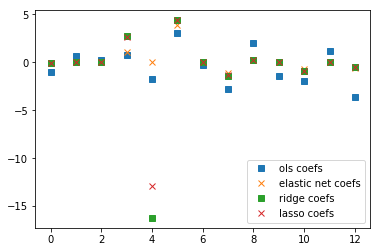

13

In [119]:
plt.plot(ols_coef, "s", label = "ols coefs")
plt.plot(el_coef, "x", label = "elastic net coefs")
plt.plot(r_coef, "s", label = "ridge coefs")
plt.plot(la_coef, "x", label = "lasso coefs")
plt.xlabel = cols
plt.legend()
plt.show()
len(cols)

so the columns appear to be essentially the same, the ols and elastic net are very close, as are the ridge and lasso coefs.  they only seam to differ slightly on ____ other than that they are the same 

$(c)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV on one of the models and Kfold on another. Comment on what changes between the default

In [120]:
from sklearn import model_selection

## k folds
#selecting a KFold model with 10 folds 
kfold = model_selection.KFold(n_splits=10, random_state=42)
results = model_selection.cross_val_score(lasso, 
                                          X_train,
                                          y_train,
                                          cv=kfold)
print("Accuracy: %.3f%%" % (results.mean()*100.0))

'''lasso accuracy on testing went down from 69 to 66
when using 10 folds '''



Accuracy: 66.886%


'lasso accuracy on testing went down from 69 to 66\nwhen using 10 folds '

In [121]:
# #leave out one 
# loocv = model_selection.LeaveOneOut()

# results = model_selection.cross_val_score(ridge, X_train, y_train, cv=loocv)
# print("Accuracy: %.3f%%" % (results.mean()*100.0))

In [138]:
from sklearn.metrics import mean_squared_error
#x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

for alpha in [.1, .2, .3, .4, .5]:
    model = Ridge(alpha)
    y_hats = []
    for i in x.index:
        x_test = x.iloc[i, :]
        x_train = x.loc[x.index != i, :]
        y_train = y.loc[x.index != i]
        y_test = y.loc[i]
        model.fit(x_train, y_train)
        y_hats.append(model.predict(x_test.to_numpy().reshape(1,-1)))
        
    print(alpha, mean_squared_error(y, y_hats))


(0.1, 0.341) (0.2, 0.321) (0.3, 0.218) (0.4, 0.204) (0.5, 0.164)


so as my alpha increases, my mse goes down. So having a higher penalty appears to help the model when we leave out some things 


###### number 6 from the last homework question 

Min MSE: 406.44763344312884
Coeff: 1.1200000000000006


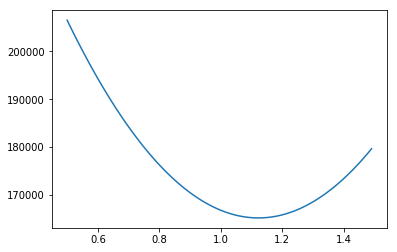

In [139]:
import numpy as np

mses = []
lstat_coef = np.arange(0.5,1.5,0.01)
for coef in lstat_coef:
    pred_values = np.array([coef * lstat for lstat in x.LSTAT.values])
    mses.append(np.sum((y - pred_values)**2))
    
plt.plot(lstat_coef, mses)
print("Min MSE: {}".format(np.sqrt(np.min(mses))))
print("Coeff: {}".format(lstat_coef[np.argmin(mses)]))